In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'data/advertising.csv'

In [3]:
def get_column(data, index):
    data = np.array(data)
    return data[:, index]

def prepare_data(file_path):
    data = np.genfromtxt(file_path, delimiter=",", skip_header=1).tolist()
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    # Stack the features column-wise to form X as a array
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = random.gauss(mu=0.0, sigma=0.01)
    # return w1, w2, w3, b

    w1, w2, w3, b = 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = (w1 * x1) + (w2 * x2) + (w3 * x3) + b
    return y_hat

# MSE
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

def compute_gradient_wi_mse(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

def compute_gradient_b_mse(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

# MAE
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

def compute_gradient_wi_mae(xi, y, y_hat):
    return xi * np.sign(y_hat - y)

def compute_gradient_b_mae(y, y_hat):
    return np.sign(y_hat - y)

# Update weight
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

#Implementing Linear Regression

In [4]:
def implement_linear_regression(x_data, y_data, epoch_max=50, lr=1e-5, mse=True):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            if mse:
                # Compute loss
                loss = compute_loss_mse(y, y_hat)
                # Compute gradient w1, w2, w3, b
                dl_dw1 = compute_gradient_wi_mse(x1, y, y_hat)
                dl_dw2 = compute_gradient_wi_mse(x2, y, y_hat)
                dl_dw3 = compute_gradient_wi_mse(x3, y, y_hat)
                dl_db = compute_gradient_b_mse(y, y_hat)
            else:
                # Compute loss
                loss = compute_loss_mse(y, y_hat)
                # Compute gradient w1, w2, w3, b
                dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
                dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
                dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
                dl_db = compute_gradient_b_mae(y, y_hat)
            
            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_wi(b, dl_db, lr)
            
            # logging
            losses.append(loss)
            
    return w1, w2, w3, b, losses


In [5]:
X, y = prepare_data(file_path)
w1, w2, w3, b, losses = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

NameError: name 'X_data' is not defined

#Implementing Linear Regression with N Samples

In [20]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5, mse=True):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total, dw2_total, dw3_total, db_total = 0.0, 0.0, 0.0, 0.0
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            if mse:
                # Compute loss
                loss = compute_loss_mse(y, y_hat)
                # Compute gradient w1, w2, w3, b
                dl_dw1 = compute_gradient_wi_mse(x1, y, y_hat)
                dl_dw2 = compute_gradient_wi_mse(x2, y, y_hat)
                dl_dw3 = compute_gradient_wi_mse(x3, y, y_hat)
                dl_db = compute_gradient_b_mse(y, y_hat)
            else:
                # Compute loss
                loss = compute_loss_mse(y, y_hat)
                # Compute gradient w1, w2, w3, b
                dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
                dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
                dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
                dl_db = compute_gradient_b_mae(y, y_hat)
            
            # Accumulate loss
            loss_total += loss
            
            # Accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        
        # Save the average loss for this epoch
        losses.append (loss_total / N)

    return w1, w2, w3, b, losses


172.98395547828923
5.809778260904676


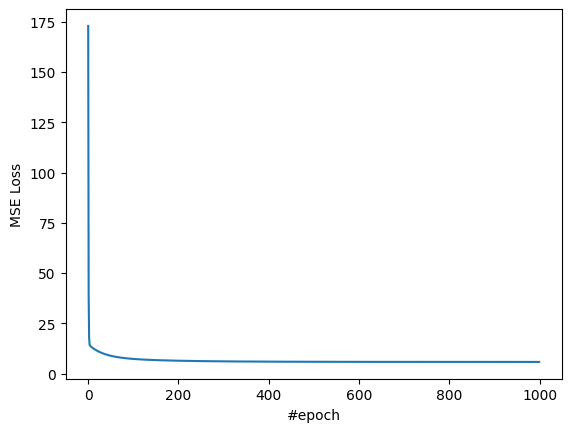

In [23]:
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000)
print(losses[0])
print(losses[-1])
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()